In [91]:
import pandas as pd
df = pd.read_csv('TV Series.csv')
df=df.iloc[:100]
df.head()

,Series Title,Release Year,Runtime,Genre,Rating,Cast,Synopsis
0,Wednesday,(2022– ),45 min,"Comedy, Crime, Fantasy",8.2,"Jenna Ortega, Hunter Doohan, Percy Hynes White...","Follows Wednesday Addams' years as a student, ..."
1,Yellowstone,(2018– ),60 min,"Drama, Western",8.7,"Kevin Costner, Luke Grimes, Kelly Reilly, Wes ...",A ranching family in Montana faces off against...
2,The White Lotus,(2021–2023),60 min,"Comedy, Drama",7.9,"Jennifer Coolidge, Jon Gries, F. Murray Abraha...","Set in a tropical resort, it follows the explo..."
3,1923,(2022–2023),60 min,"Drama, Western",8.6,"Harrison Ford, Helen Mirren, Brandon Sklenar, ...",The Duttons face a new set of challenges in th...
4,Jack Ryan,(2018– ),60 min,"Action, Drama, Thriller",8.0,"John Krasinski, Wendell Pierce, Michael Kelly,...","Up-and-coming CIA analyst, Jack Ryan, is thrus..."


### Creating a graph from this dataset

In [97]:
import itertools
genre_graph = {}

for genres in df['Genre']:
    genre_list = genres.split(", ")
    # preprocessing
    
    # EXPLANATION
    # Create edges between genres in the same series
    for genre1, genre2 in itertools.combinations(genre_list, 2):
        if genre1 not in genre_graph:
            genre_graph[genre1] = []
        if genre2 not in genre_graph[genre1]:
            genre_graph[genre1].append(genre2)

        if genre2 not in genre_graph:
            genre_graph[genre2] = []
        if genre1 not in genre_graph[genre2]:
            genre_graph[genre2].append(genre1)

In [98]:
genre_graph

{'Comedy': ['Crime',
  'Fantasy',
  'Drama',
  'Romance',
  'Action',
  'Sport',
  'Animation',
  'Adventure',
  'Biography',
  'Family'],
 'Crime': ['Comedy',
  'Fantasy',
  'Drama',
  'Action',
  'Adventure',
  'Thriller',
  'Mystery',
  'Romance'],
 'Fantasy': ['Comedy', 'Crime', 'Horror', 'Drama', 'Action', 'Adventure'],
 'Drama': ['Western',
  'Comedy',
  'Action',
  'Thriller',
  'Crime',
  'Mystery',
  'Adventure',
  'Horror',
  'Romance',
  'Family',
  'Fantasy',
  'Biography',
  'History',
  'Sci-Fi',
  'Documentary',
  'Sport'],
 'Western': ['Drama'],
 'Action': ['Drama',
  'Thriller',
  'Mystery',
  'Adventure',
  'Crime',
  'Comedy',
  'Animation',
  'Fantasy',
  'History'],
 'Thriller': ['Action', 'Drama', 'Horror', 'Crime', 'Mystery', 'Sci-Fi'],
 'Mystery': ['Action',
  'Drama',
  'Crime',
  'Sci-Fi',
  'Thriller',
  'Adventure',
  'Horror'],
 'Adventure': ['Action',
  'Crime',
  'Drama',
  'Family',
  'Mystery',
  'Sci-Fi',
  'Animation',
  'Comedy',
  'Fantasy'],
 'Horr

### Visualizing the graph

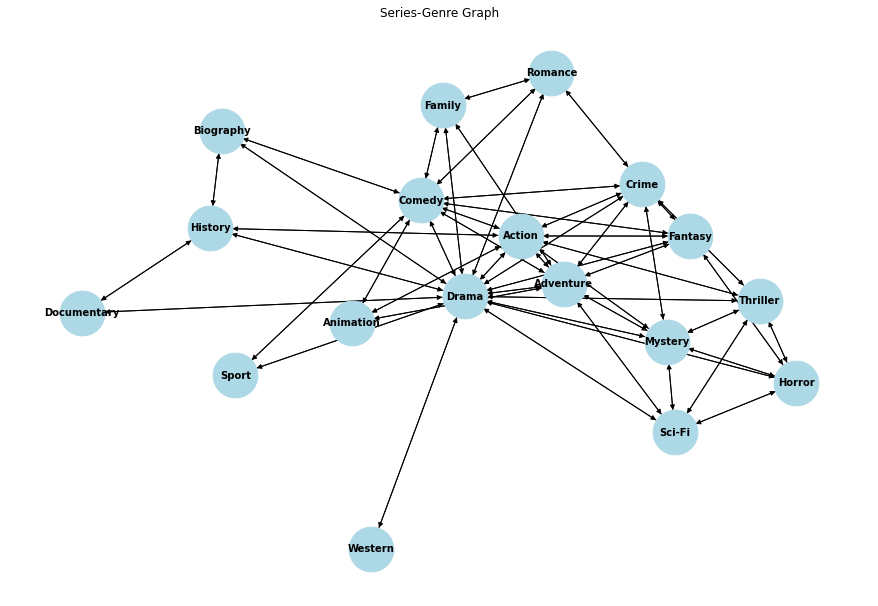

In [99]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()
for genre, series_list in genre_graph.items():
    for series in series_list:
        G.add_edge(genre, series)
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)
plt.title("Series-Genre Graph")
plt.show()

### Pagerank Algorithm

In [102]:
def compute_pagerank(graph, damping_factor=0.85, tol=1e-6):
    num_genres = len(graph)
    pagerank = {genre: 1.0 / num_genres for genre in graph}
    
    #STARTING THE ITERATION
    for _ in range(100):
        new_pagerank = {}
        for genre in graph:
            # Explanation
            # we are updating the pagerank values using the influence of the neighbor genres
            rank_sum = sum(pagerank[neighbor] / len(graph[neighbor]) for neighbor in graph[genre])
            new_pagerank[genre] = (1 - damping_factor) / num_genres + damping_factor * rank_sum

        # Convergence checking 
        if sum(abs(new_pagerank[genre] - pagerank[genre]) for genre in pagerank) < tol:
            break
        pagerank = new_pagerank
    
    return pagerank

pagerank_scores = compute_pagerank(genre_graph)
print("PageRank Scores:", pagerank_scores)

PageRank Scores: {'Comedy': 0.09274257203228346, 'Crime': 0.07128385309983042, 'Fantasy': 0.055086316377643524, 'Drama': 0.14964192489613135, 'Western': 0.016283075163655826, 'Action': 0.08098742431553721, 'Thriller': 0.055345262719072544, 'Mystery': 0.06311623019106351, 'Adventure': 0.08041235329282934, 'Horror': 0.04766412815425006, 'Romance': 0.04030948203389856, 'Family': 0.040326470581268106, 'Biography': 0.03359683638901329, 'History': 0.044379221526268234, 'Sci-Fi': 0.04748516693492767, 'Documentary': 0.025713700187868244, 'Sport': 0.024166211364800877, 'Animation': 0.03145977073965768}


### Recommendation System

In [109]:
def recommend_series(series_title, n_recommendations):
    if series_title not in df['Series Title'].values:
        return f"Series '{series_title}' not found."

    # explanation
    # getting the genres of the input series
    genres = df[df['Series Title']==series_title]['Genre'].values[0].split(", ")
    recommendations = []

    # For each genre of the input series
    # We take the score of the series with the shared genre
    for title in df['Series Title']:
        if title != series_title:
            title_genres = df[df['Series Title'] == title]['Genre'].values[0].split(", ")
            score = sum(pagerank_scores.get(genre, 0) for genre in genres if genre in title_genres)
            recommendations.append((title, score))

    # EXPLANATION
    # Sorting the score in descending order to get the top series recommendations
    recommendations.sort(key=lambda x: x[1], reverse=True)
    return [title for title, score in recommendations[:n_recommendations]]

recommended_titles = recommend_series('Wednesday',5)
print("Recommended Series:", recommended_titles)

Recommended Series: ['The Boys', 'Bones', 'Death in Paradise', 'Dead to Me', 'Ghosts']
